## Health Care

### Heart Disease

###### Demo 11

In [113]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno # pip install missingno
from scipy import stats

In [114]:
train = pd.read_csv('heart_2020_cleaned.csv')
print(train.head(3))

  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  
2              Yes       Fair        8.0    Yes            No         No  


In [115]:
train.describe(include='all')

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795,319795.000000,319795,319795,319795,319795.00000,319795.000000,319795,319795,319795,319795,319795,319795,319795,319795.000000,319795,319795,319795
unique,2,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,292422,NaN,187887,298018,307726,NaN,NaN,275385,167805,34151,245212,269653,247957,113858,NaN,276923,308016,289976
mean,NaN,28.325399,NaN,NaN,NaN,3.37171,3.898366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.097075,NaN,NaN,NaN
std,NaN,6.356100,NaN,NaN,NaN,7.95085,7.955235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436007,NaN,NaN,NaN
min,NaN,12.020000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,24.030000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,27.340000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,NaN,31.420000,NaN,NaN,NaN,2.00000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


BMI = Body Mass Index (kg/m2), normal 19-23

PhysicalHealth = Now thinking about your physical health, which includes physical illness and injury, for how many **DAYS** during the pass 30

SleepTime = On average, how many **HOURS** of sleep do you get in a 24 hour period?

### Missingno

ability to understand the distribution of missing values though informative visualizations (pip install missingno)

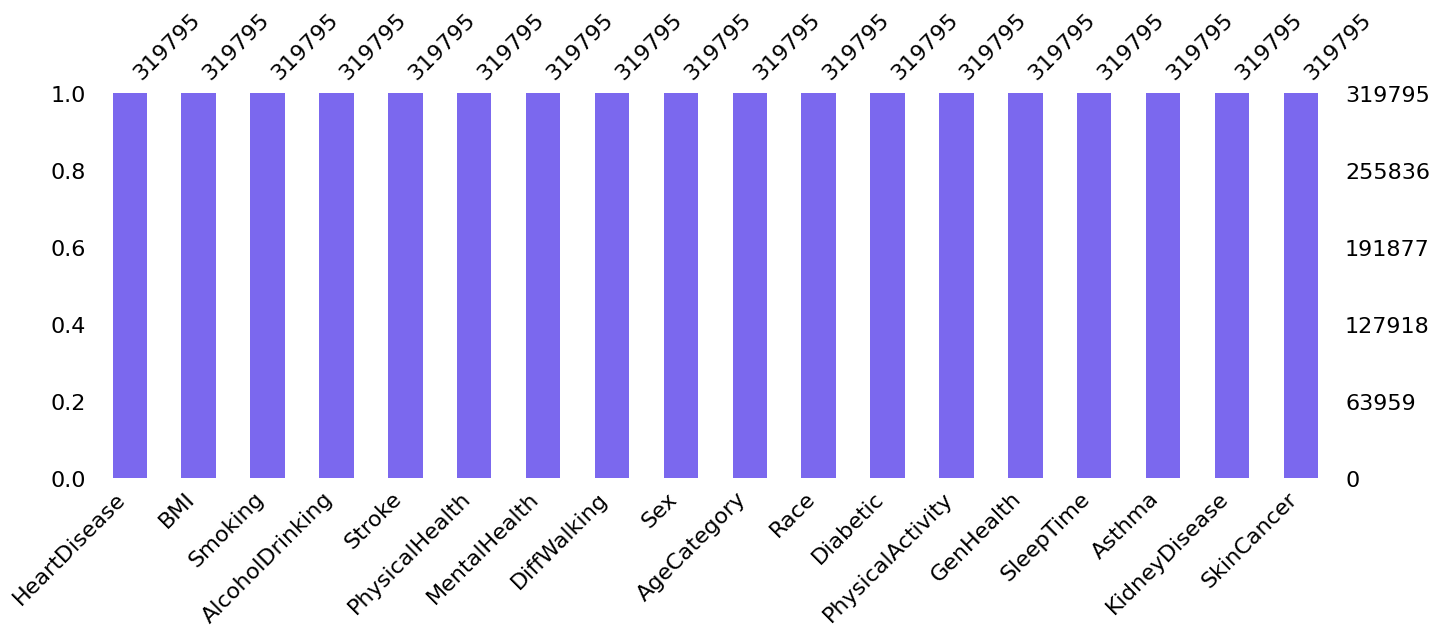

In [116]:
msno.bar(train, figsize = (16,5),color = '#7B68EE')
plt.show()
# the lower the bar is, the more missing values it has

### Distribution of the target variable

<Axes: xlabel='HeartDisease', ylabel='count'>

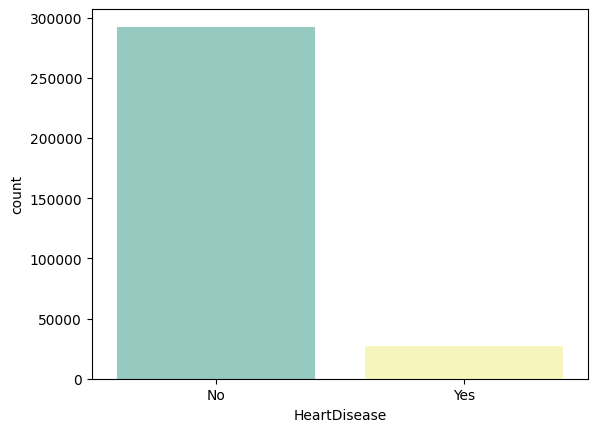

In [117]:
sns.countplot(x='HeartDisease',data=train,palette='Set3')

In [118]:
train.describe(include='float64') # display float

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [119]:
train.describe(include='O') # display object

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


In [142]:
for col in train.describe(include='all'):
    print(col)

BMI
Smoking
AlcoholDrinking
Stroke
PhysicalHealth
MentalHealth
DiffWalking
Sex
AgeCategory
Race
Diabetic
PhysicalActivity
GenHealth
SleepTime
Asthma
KidneyDisease
SkinCancer


In [121]:
# print(train.info())

numeric_features = ['BMI','PhysicalHealth','MentalHealth','SleepTime']
categorical_features = ['HeartDisease','Smoking','AlcoholDrinking','Stroke',
                        'DiffWalking','Sex','AgeCategory','Race','Diabetic',
        'PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer']

### Visualizing continuous columns

C:\Users\User\AppData\Local\Temp\ipykernel_33352\1155202015.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[i],ax=ax[index,0],color='green')
C:\Users\User\AppData\Local\Temp\ipykernel_33352\1155202015.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[i],ax=ax[index,0],color='

Text(0.5, 0.98, 'Visualizing continuous columns (train dataset)')

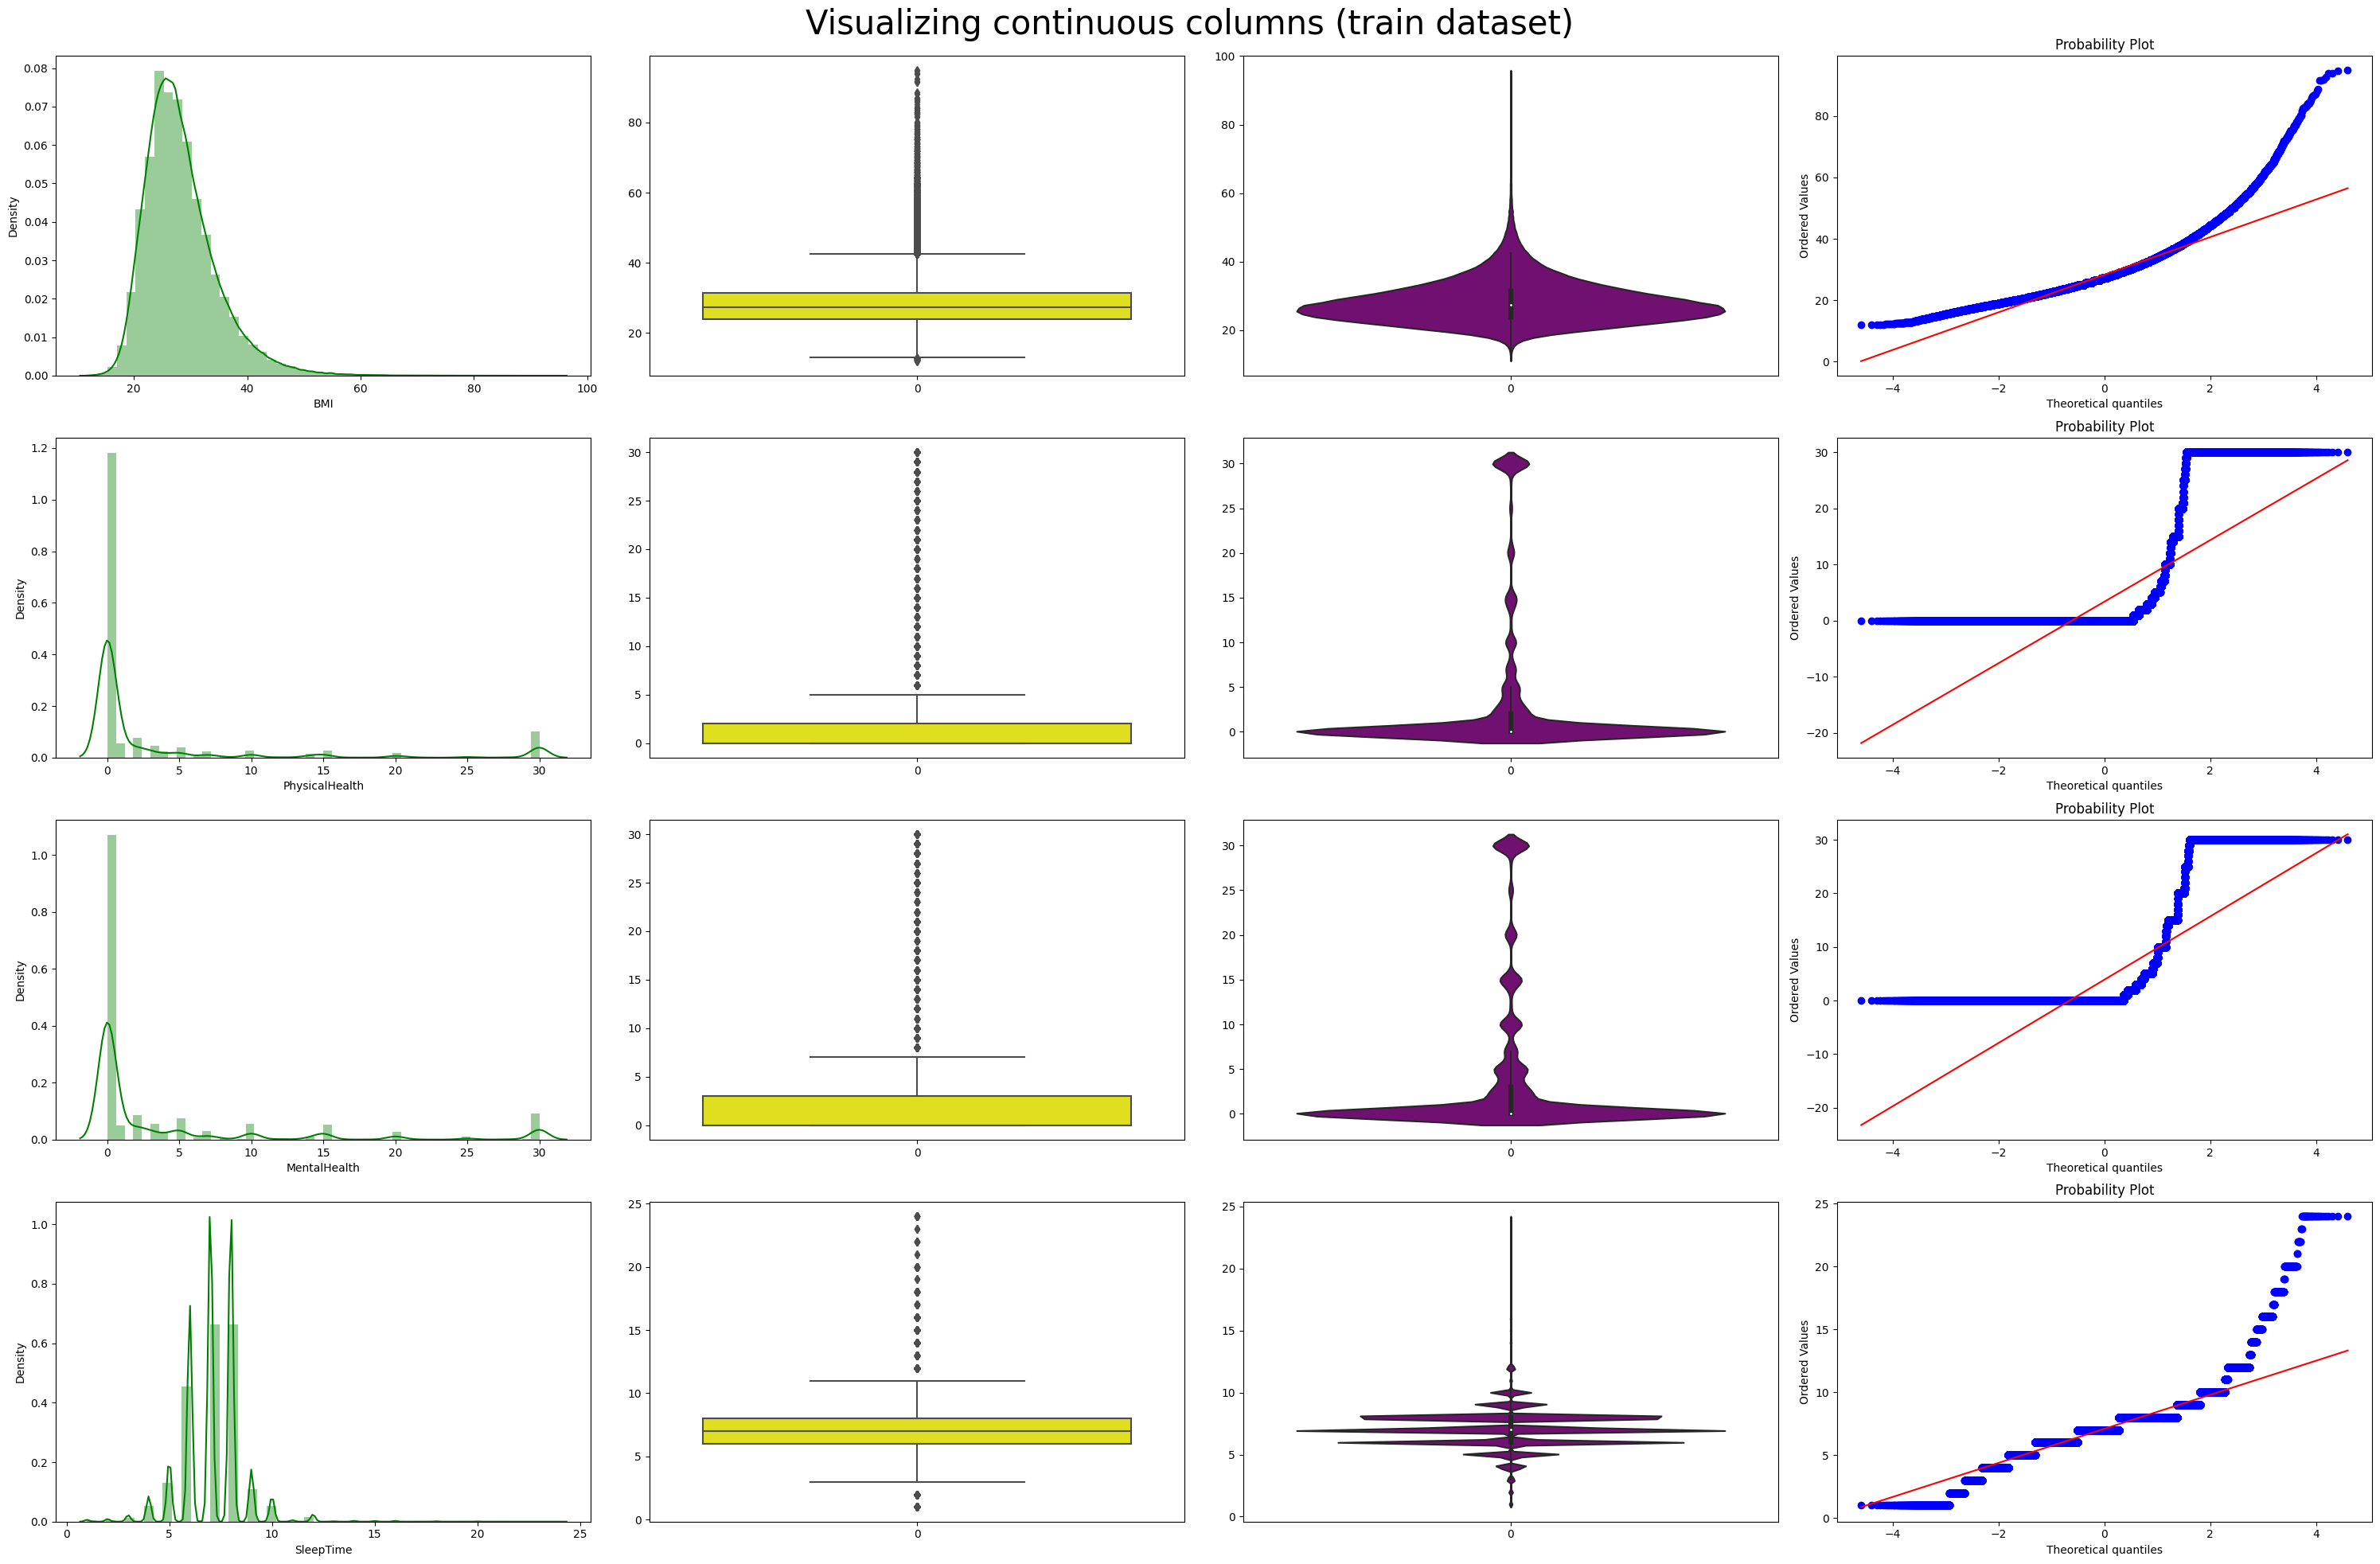

In [122]:
# import warnings #     warnings triggered during the process of importing a module
# warnings.fillterwarnings('ignore) # ignore all warnings by setting 'ignore' as a pa

# plt.subplots() returns a tuple containing a figure and axes object(s).
# fig, ax = plt.subplots() to unpack this tuple into the variables fig and ax
fig,ax = plt.subplots(len(numeric_features),4,figsize=(30,20))
# enumerate() returns a tuple with the counter and value
for index,i in enumerate(numeric_features):
    # displot: data distribution of a variable against the density distribution.
    sns.distplot(train[i],ax=ax[index,0],color='green')
    # represents the min, max, median, 25% and 75%
    sns.boxplot(train[i],ax=ax[index,1],color='yellow')
    # violin plots depict summary statistics and the density of each variable.
    sns.violinplot(train[i],ax=ax[index,2],color='purple')
    # if a data set is normal or Weibull distribution.
    stats.probplot(train[i],plot=ax[index,3])
# automatically adjusts subplot params so the subplot(s) fits in the figure area.
# automatically adjusts subplot params to fits in the figure area.
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous columns (train dataset)",
             fontsize=30)

### distribution of the number of people with heart disease from various factors

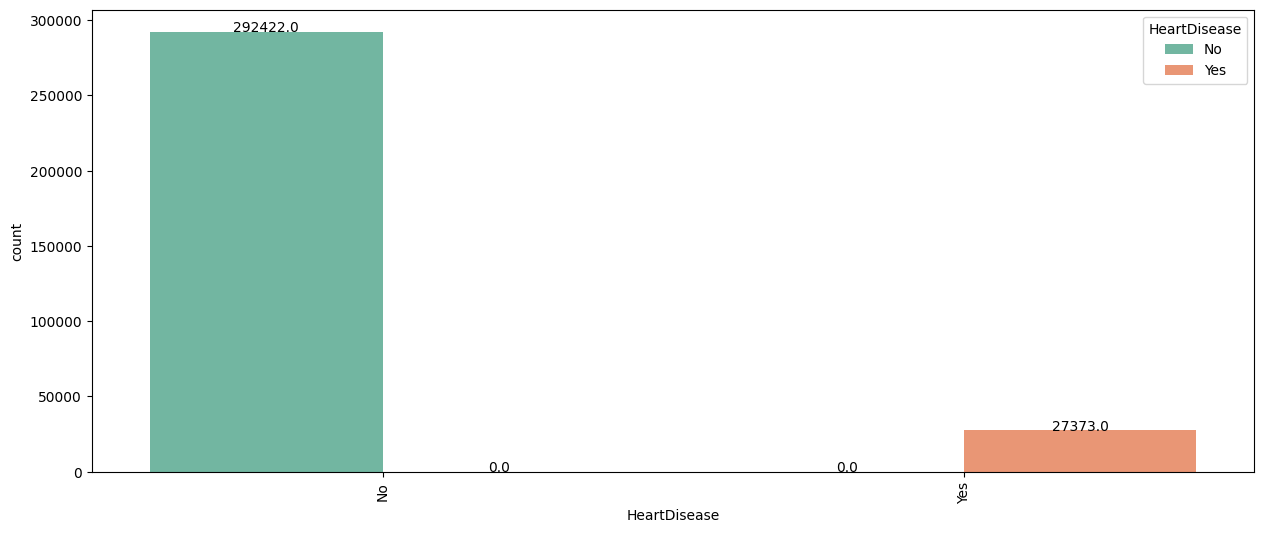

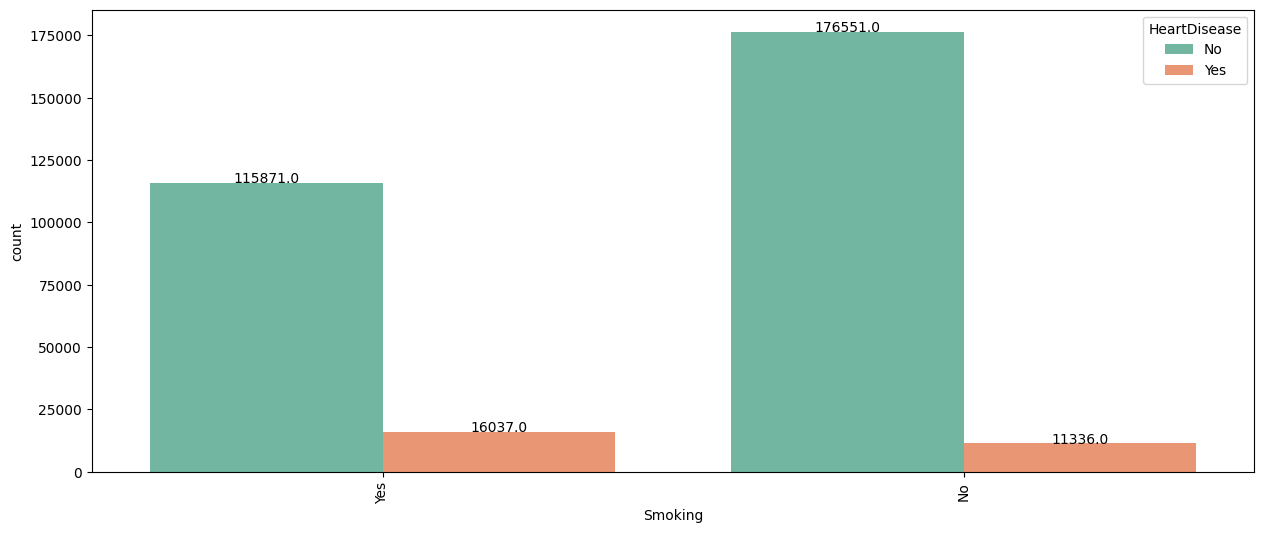

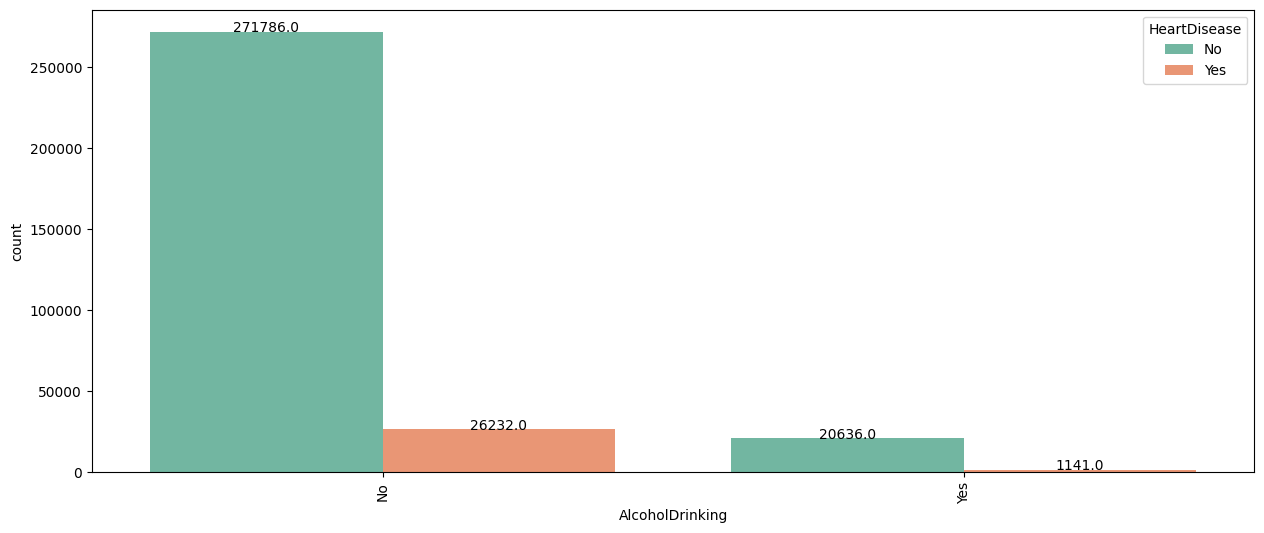

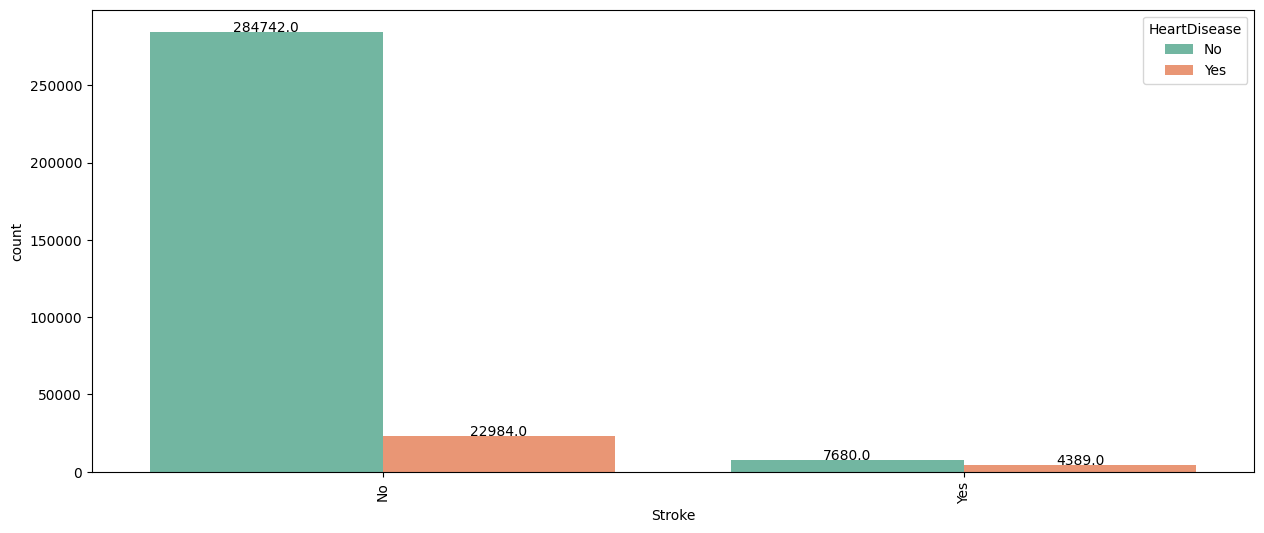

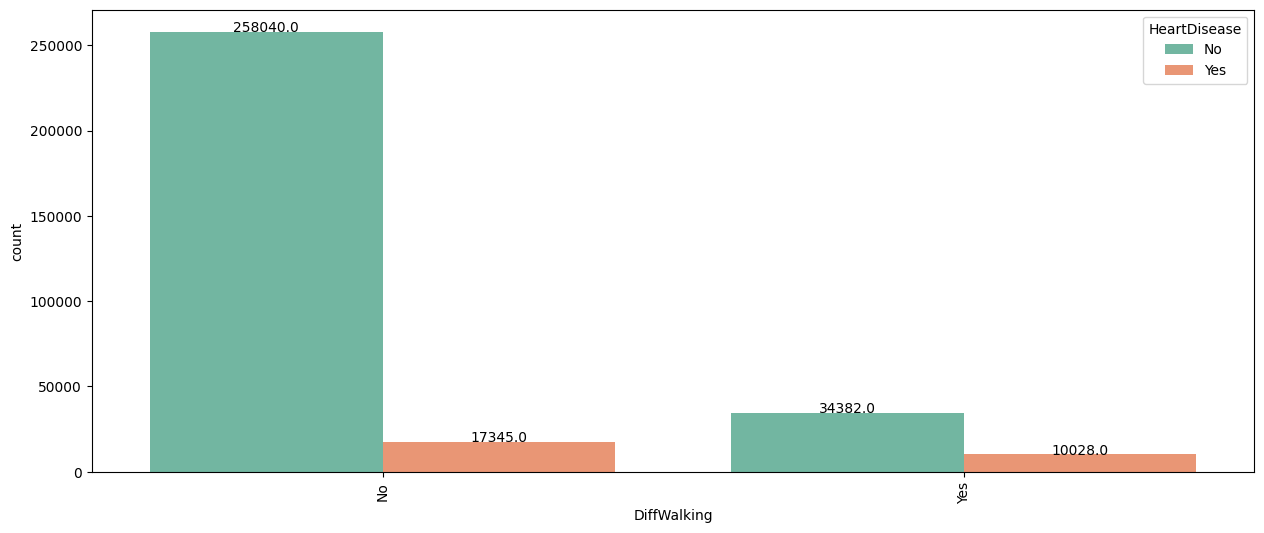

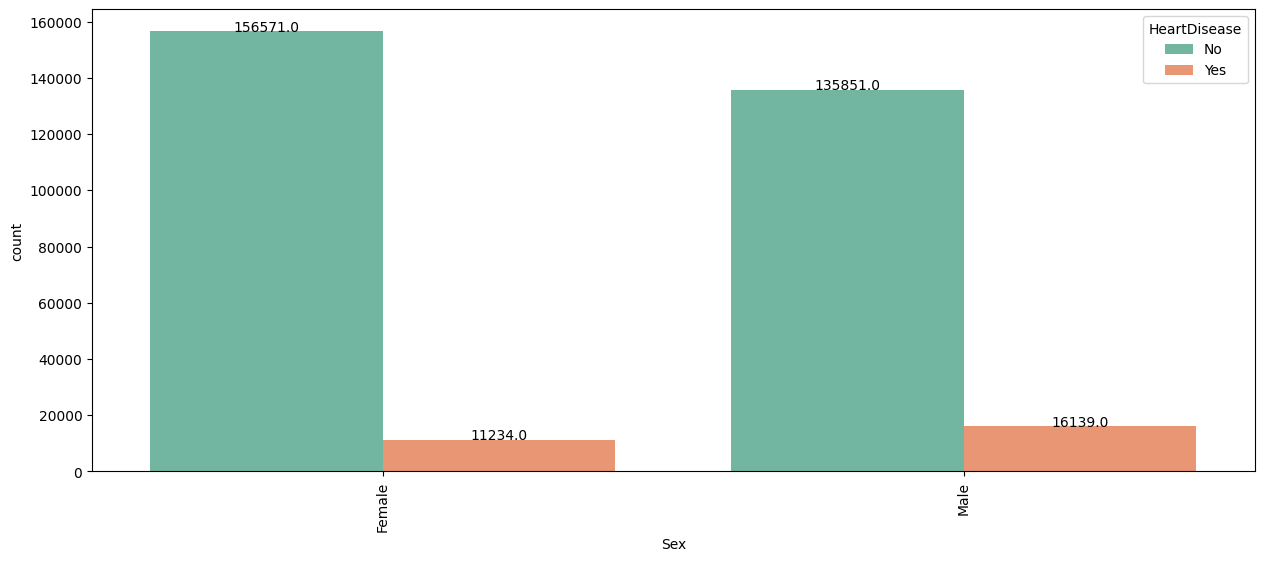

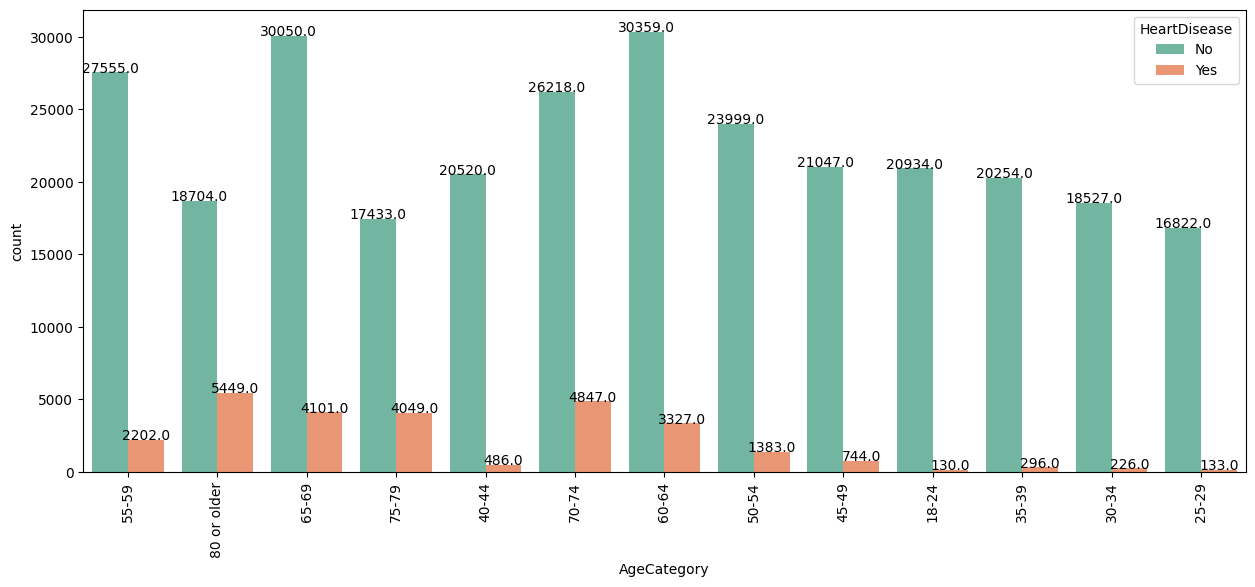

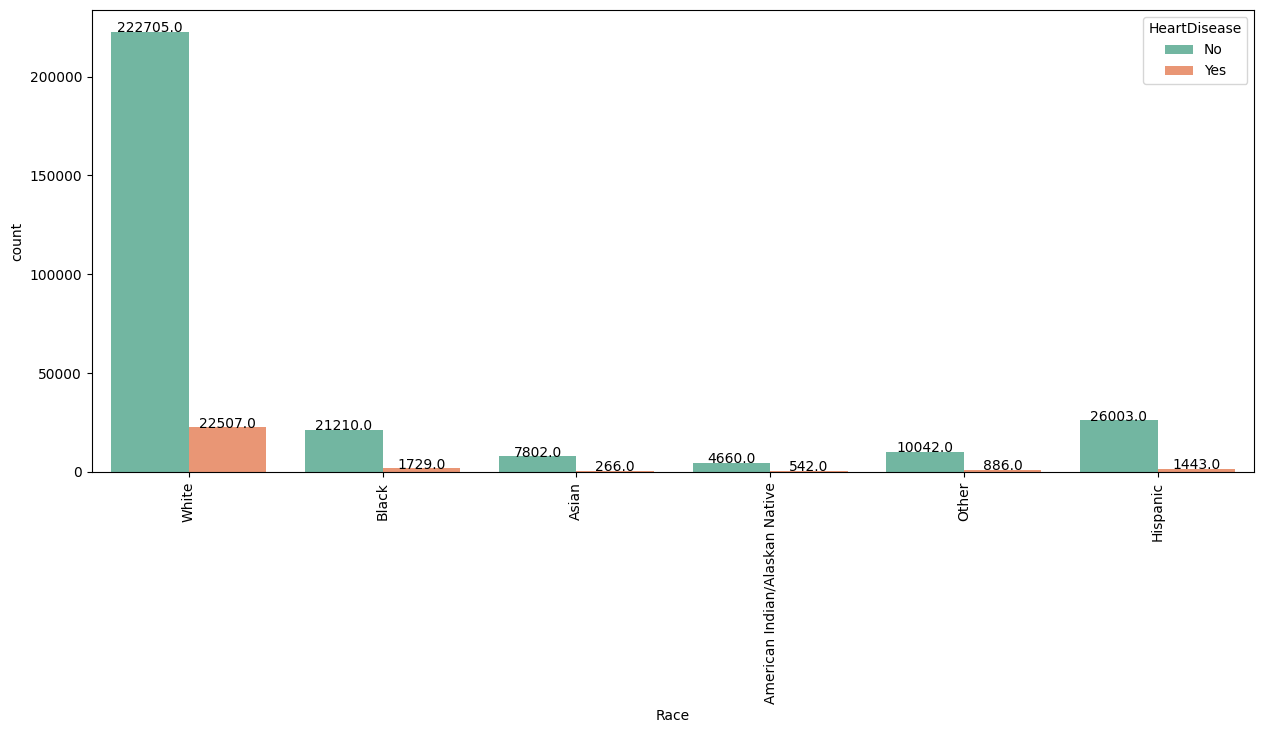

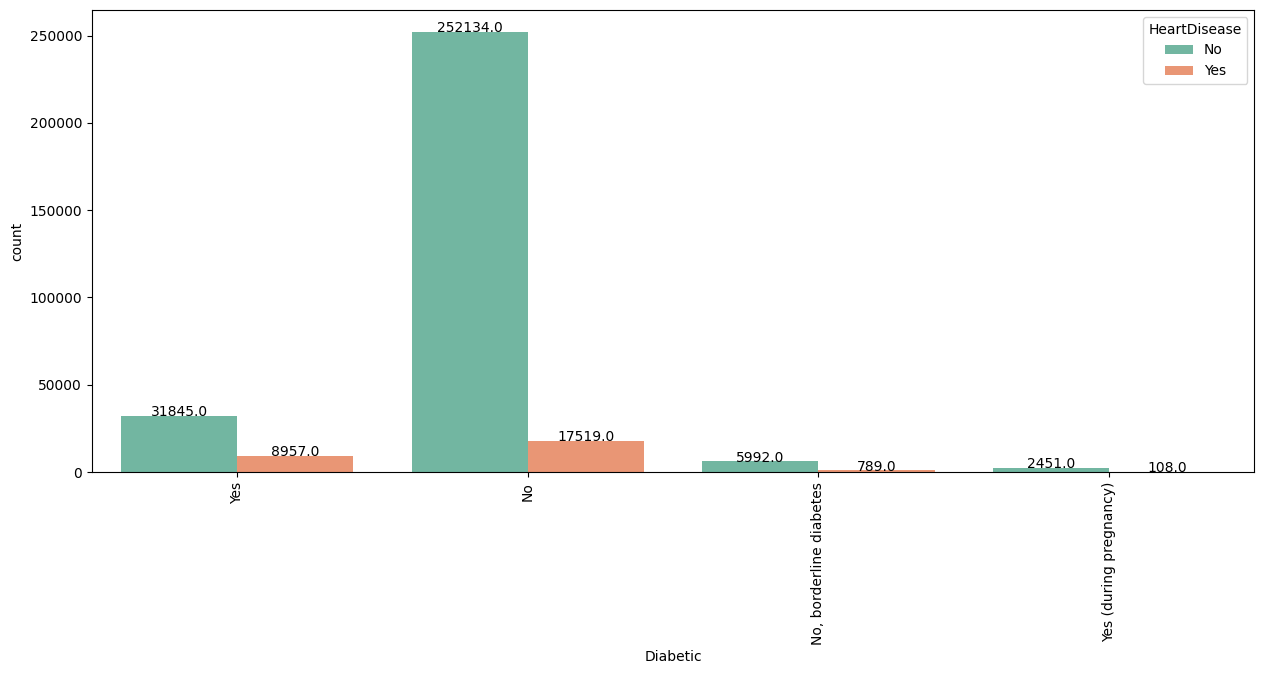

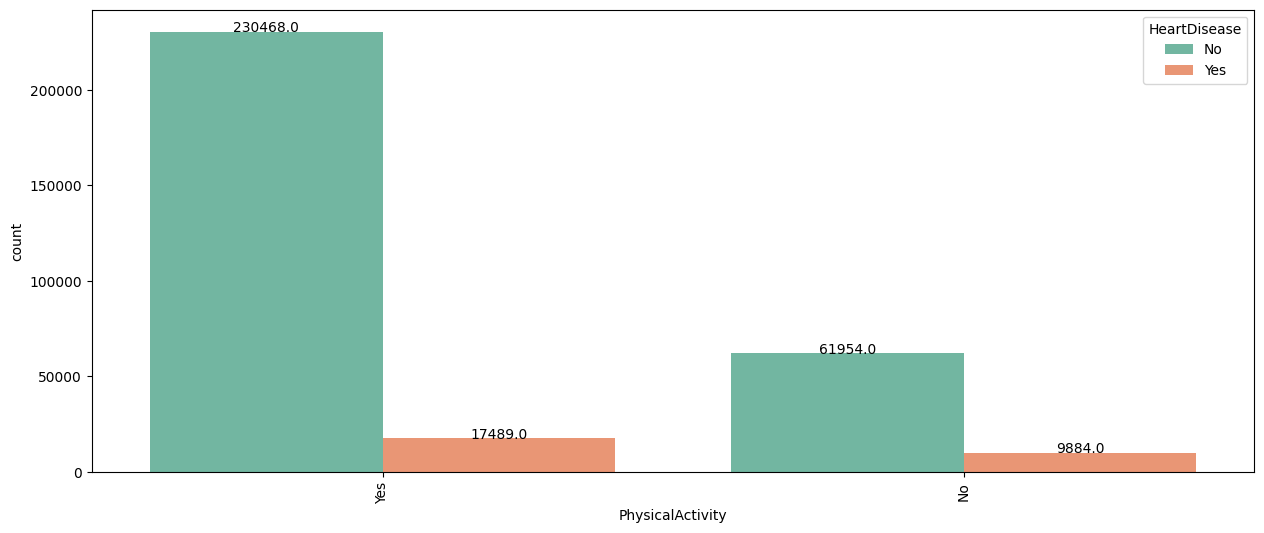

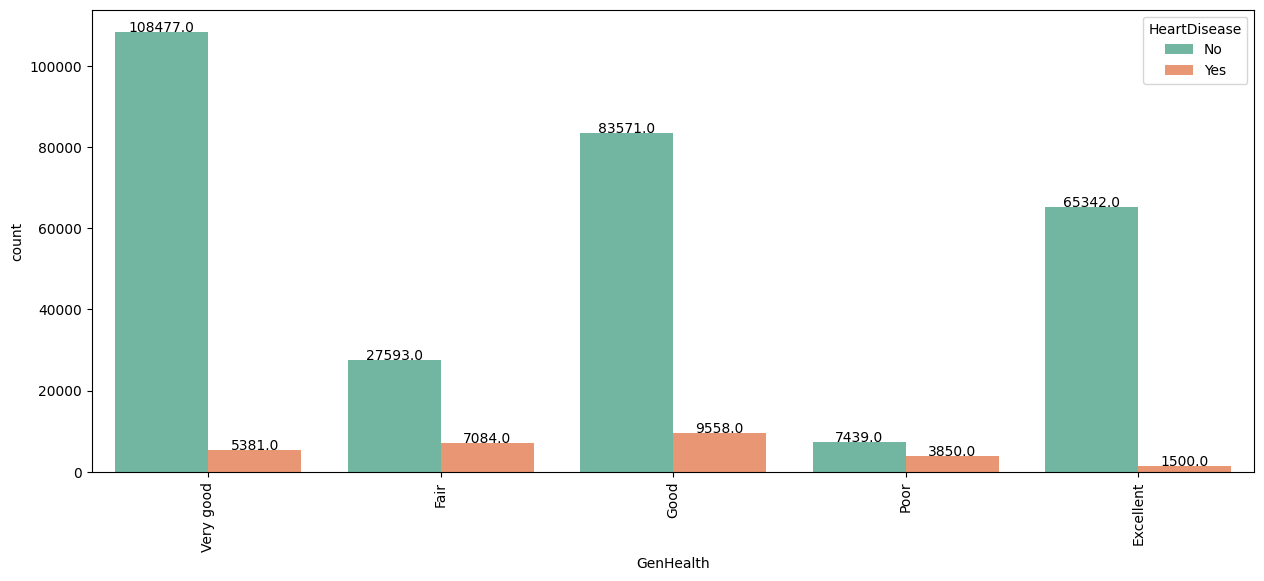

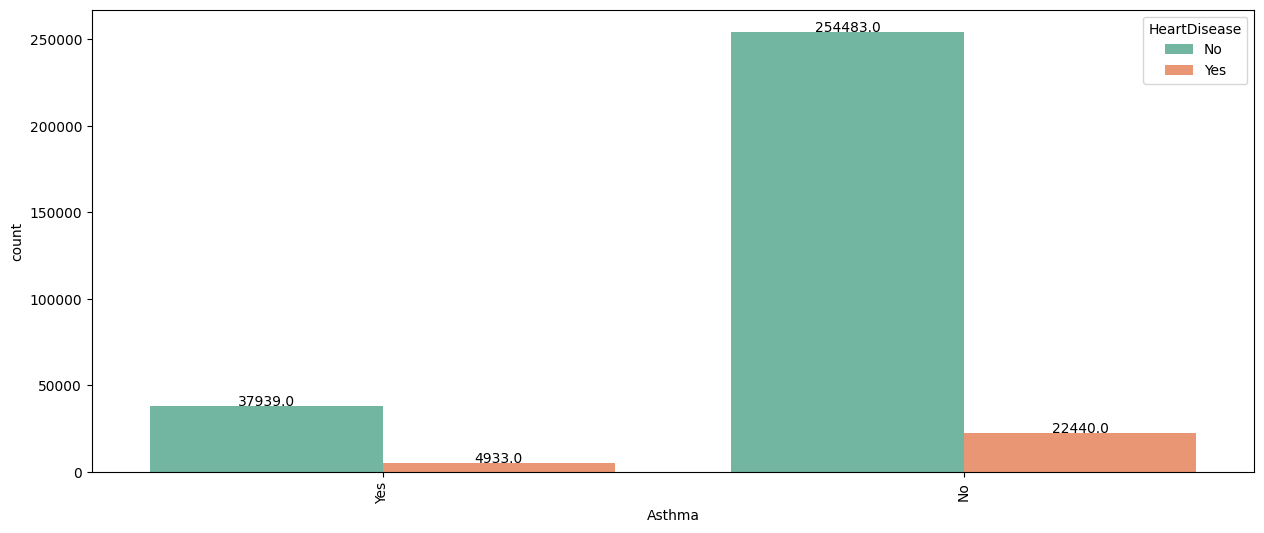

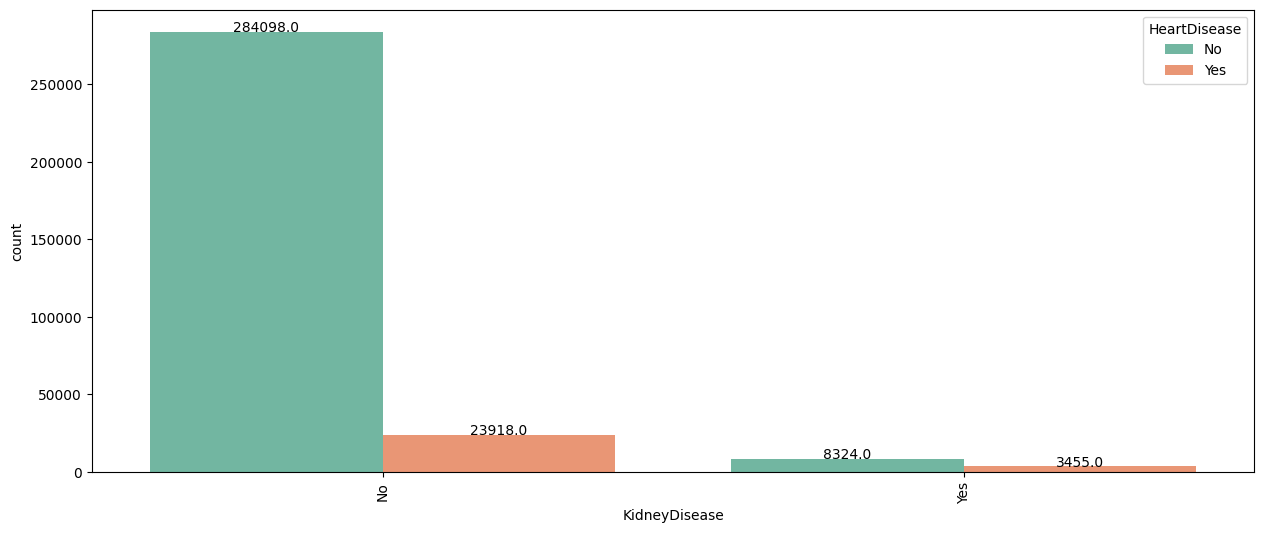

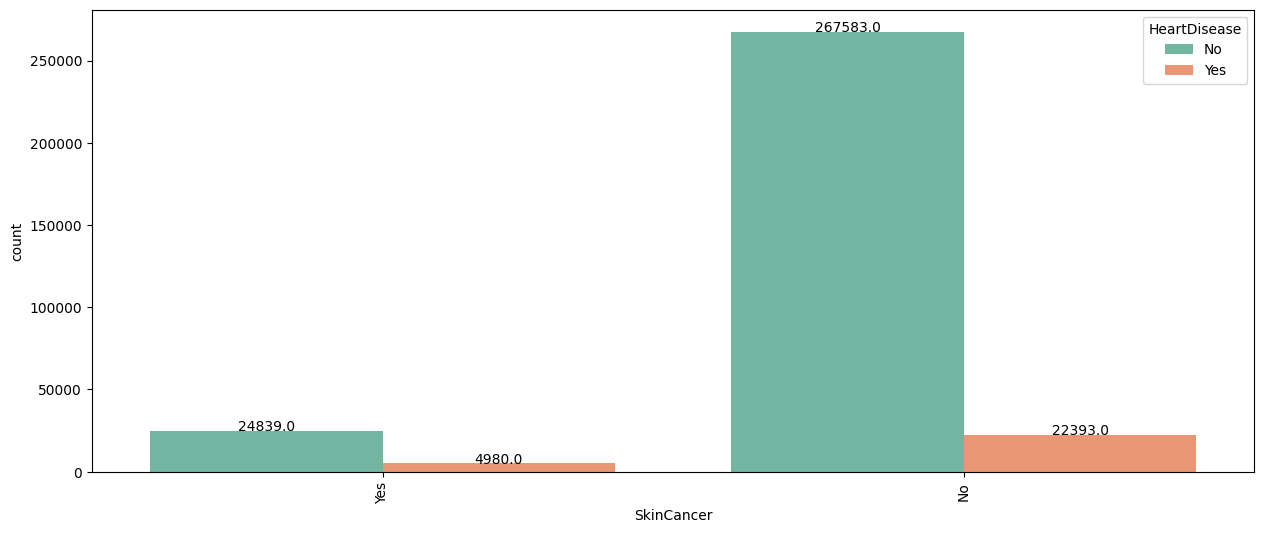

In [123]:
for feature in categorical_features:
    fig, ax1 = plt.subplots(figsize=(15,6))
    graph = sns.countplot(ax=ax1,x = feature , data = train,hue='HeartDisease',
                          palette='Set2')
    graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
    for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,
                   ha="center")

### Transform our dataset using the OrdinalEncoder method

Encode categorical features as an integer array.

In [124]:
# Turns each label into an integer value and
# depicts the sequence of labels in the encoded data,
# eg"red" is 1, "green" is 2
from sklearn.preprocessing import OrdinalEncoder
# OrdinalEncoder() replaces the categories by digits
enc = OrdinalEncoder()
enc.fit(train[categorical_features]) # fit to prepare the mapping
train[categorical_features] = enc.transform(
    train[categorical_features])

### Build correlation table

In [125]:
correlation = train.corr()
print(correlation['HeartDisease'].sort_values(ascending = False),'\n')

HeartDisease        1.000000
AgeCategory         0.233432
DiffWalking         0.201258
Stroke              0.196835
PhysicalHealth      0.170721
Diabetic            0.168553
KidneyDisease       0.145197
Smoking             0.107764
SkinCancer          0.093317
Sex                 0.070040
BMI                 0.051803
Asthma              0.041444
Race                0.034854
MentalHealth        0.028591
SleepTime           0.008327
GenHealth          -0.011062
AlcoholDrinking    -0.032080
PhysicalActivity   -0.100030
Name: HeartDisease, dtype: float64 



### Correlation Heat Map

Index(['HeartDisease', 'AgeCategory', 'DiffWalking', 'Stroke',
       'PhysicalHealth', 'Diabetic', 'KidneyDisease', 'Smoking', 'SkinCancer',
       'Sex', 'BMI', 'Asthma', 'Race', 'MentalHealth', 'SleepTime',
       'GenHealth', 'AlcoholDrinking', 'PhysicalActivity'],
      dtype='object')


<Axes: >

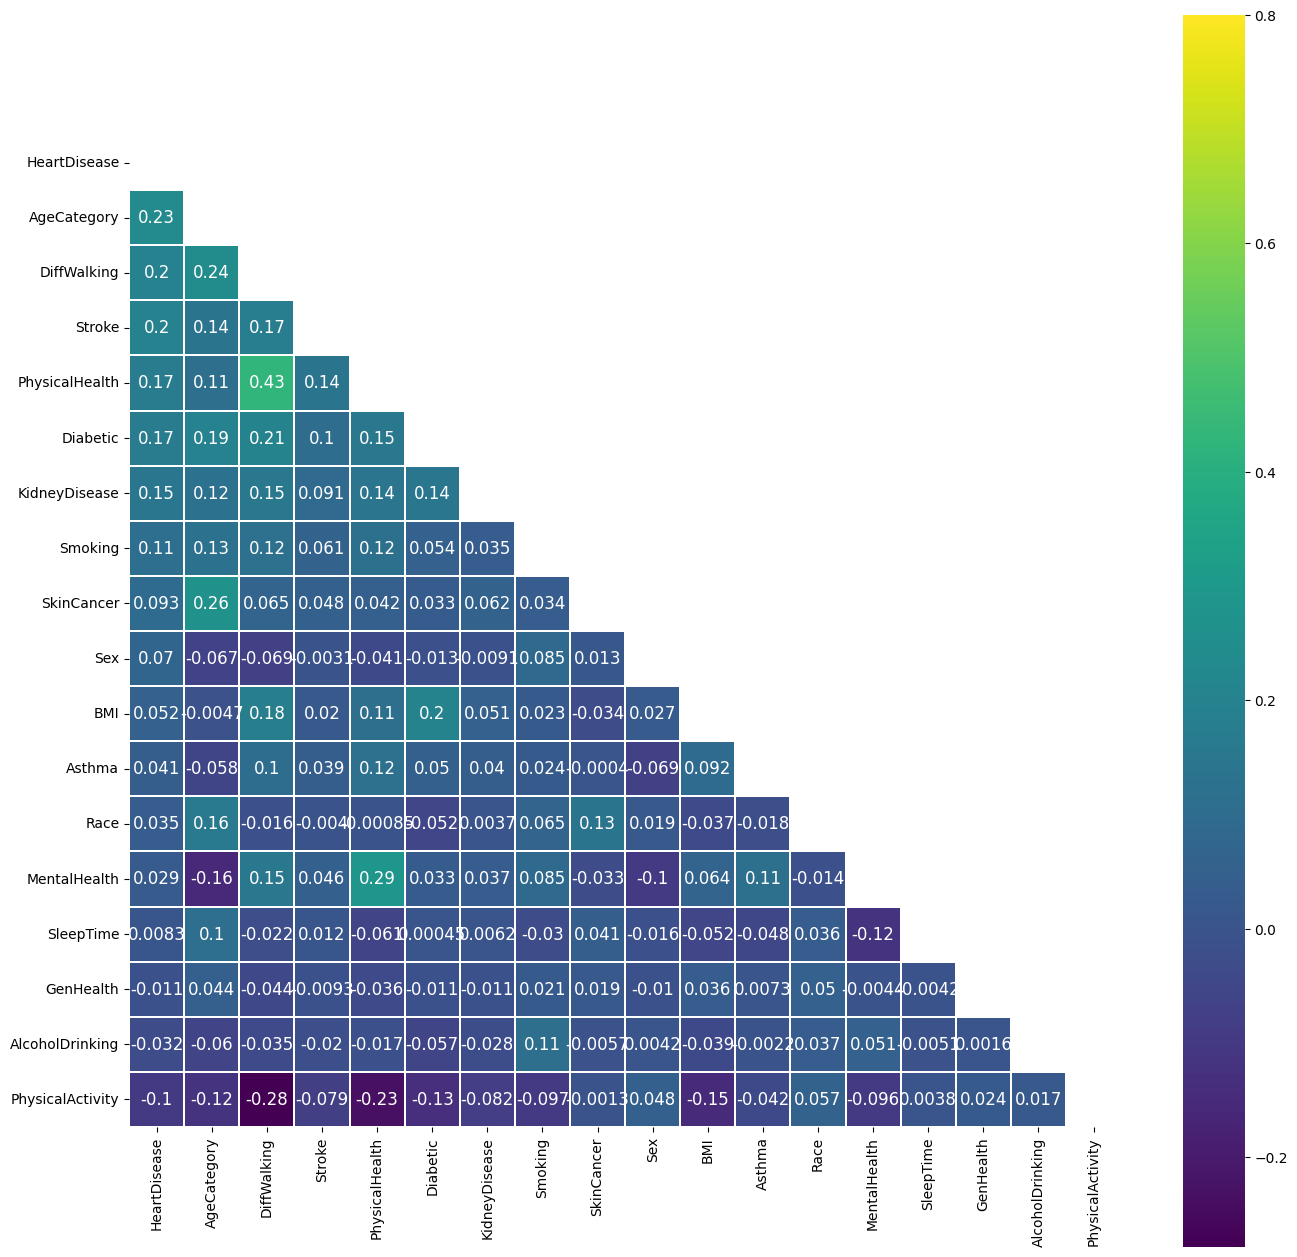

In [126]:
k = correlation.shape[1]
# Return the first k rows (categorical_features) with
# the largest values in HeartDisease columns
cols = correlation.nlargest(k,'HeartDisease')['HeartDisease'].index
print(cols)
# Cross-correlation of two sequences. .T as self.transpose
cm = np.corrcoef(train[cols].values.T)
# get a copy of a matrix with the elements below
# the k-th diagonal zeroed.
mask = np.triu(np.ones_like(train.corr()))
f, ax = plt.subplots(figsize = (16,16))
sns.heatmap(cm,mask=mask, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,
            annot_kws = {'size':12},yticklabels = cols.values)

True Positive  
Have cancer and the model classifying his case as cancer  

True Negative  
NOT having cancer and the model classifying his case as NOT cancer  

False Positive  
Not Having cancer and the model classifying his case as cancer  

False Negative  
Having cancer and the model classifying his case as No-cancer  

The Precision is a measure that tells us what proportion of patients that we diagnosed as having cancer,actually had cancer.(TP)/(TP + FP)  

The recall is a measure that tells us what proportion of patients that actually had cancer was diagnosed by the algonithm as having cancer.(TP)/(TP + FN)

In [127]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
#  makes classifications based on data neighbors.
from sklearn.neighbors import KNeighborsClassifier
## uses math to find the relationships between two data factors
from sklearn.linear_model import LogisticRegression
# calculates the accuracy score for a set of predicted labels
# against the true labels.
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score
# Model's accuracy. It combines the precision and 
# recall scores of a model.
from sklearn.metrics import f1_score

In [128]:
y=train['HeartDisease']
# axis=1 means we are dropping the column, not the row
# inplace=True: drop all missing values from your original dataset
train.drop('HeartDisease',axis=1,inplace=True)
X_train, X_test, y_train, y_test=train_test_split(train,y,
                                                  test_size=0.1,
                                                  random_state=42)

In [129]:
models = [KNeighborsClassifier(), LogisticRegression()]
scores = dict()
for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test.values)
    
    print(f'model: {str(m)}')
    # Calculate the accuracy of a classification model
    print(f'Accuracy_score: {accuracy_score(y_test,y_pred)}')
    # Precision measures the accuracy of positive predictions.
    print(f'Precission_score: {precision_score(y_test,y_pred)}')
    # recall measures the completeness of positive predictions.
    print(f'Recall_score: {recall_score(y_test,y_pred)}')
    # F1 score of 0.7 or higher is often considered good
    print(f'Fl-score: {f1_score(y_test,y_pred)}')
    print('-'*30, '\n')

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


model: KNeighborsClassifier()
Accuracy_score: 0.9027517198248906
Precission_score: 0.3271428571428571
Recall_score: 0.0798465829846583
Fl-score: 0.12836322869955158
------------------------------ 

model: LogisticRegression()
Accuracy_score: 0.9115697310819262
Precission_score: 0.5423728813559322
Recall_score: 0.08926080892608089
Fl-score: 0.1532934131736527
------------------------------ 



c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [133]:
LR = LogisticRegression()
LR.fit(train, y)
#LR.coef_
#LR.intercept_
# create a function for prediction
def test_HeartDisease(test):
    if LR.predict(test)==0:
        print('You seem healthy and no Heart Disease.')
    else:
        print('According to Heart Disease model, \
you may be under concerned. Please consult your Dr.')

In [134]:
# test the function wit the given index(cases)
test_HeartDisease(train[train.index==5])

You seem healthy and no Heart Disease.


In [135]:
test_HeartDisease(train[train.index==35])

According to Heart Disease model, you may be under concerned. Please consult your Dr.


In [136]:
test_HeartDisease(train[train.index==404])

According to Heart Disease model, you may be under concerned. Please consult your Dr.


In [137]:
test_HeartDisease(train[train.index==3317])

According to Heart Disease model, you may be under concerned. Please consult your Dr.


In [138]:
test_HeartDisease(train[train.index==1311])

According to Heart Disease model, you may be under concerned. Please consult your Dr.


In [139]:
origin_data = pd.read_csv('heart_2020_cleaned.csv')
origin_data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [140]:
for c in categorical_features:
    if c != 'HeartDisease':
        print(c, sorted(origin_data[c].unique()))
        print(c, sorted(train[c].unique()))

Smoking ['No', 'Yes']
Smoking [0.0, 1.0]
AlcoholDrinking ['No', 'Yes']
AlcoholDrinking [0.0, 1.0]
Stroke ['No', 'Yes']
Stroke [0.0, 1.0]
DiffWalking ['No', 'Yes']
DiffWalking [0.0, 1.0]
Sex ['Female', 'Male']
Sex [0.0, 1.0]
AgeCategory ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']
AgeCategory [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
Race ['American Indian/Alaskan Native', 'Asian', 'Black', 'Hispanic', 'Other', 'White']
Race [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
Diabetic ['No', 'No, borderline diabetes', 'Yes', 'Yes (during pregnancy)']
Diabetic [0.0, 1.0, 2.0, 3.0]
PhysicalActivity ['No', 'Yes']
PhysicalActivity [0.0, 1.0]
GenHealth ['Excellent', 'Fair', 'Good', 'Poor', 'Very good']
GenHealth [0.0, 1.0, 2.0, 3.0, 4.0]
Asthma ['No', 'Yes']
Asthma [0.0, 1.0]
KidneyDisease ['No', 'Yes']
KidneyDisease [0.0, 1.0]
SkinCancer ['No', 'Yes']
SkinCancer [0.0, 1.0]


In [143]:
# input your own data
headthy_test = pd.DataFrame({'BMI': 23,
                             'Smoking': 0, # Non smoker
                             'AlcoholDrinking': 0, # No
                             'Stroke':0 , # No
                             'PhysicalHealth': 0 , # 0 day injury
                             'MentalHealth': 0 , # 0 day not good
                             'DiffWalking': 0 , # No
                             'Sex': 1 , # Male
                             'AgeCategory':5 , # 45-50
                             'Race': 1 , # Asian
                             'Diabetic': 0 , # no
                             'PhysicalActivity': 1 , # Yes, physical activity or exercise
                             'GenHealth': 0 , # Excellent
                             'SleepTime': 8 , # 8 hours
                             'Asthma': 0 , # No
                             'KidneyDisease': 0 , # No
                             'SkinCancer': 0},index=[1]) # No

In [144]:
test_HeartDisease(headthy_test)

You seem healthy and no Heart Disease.
